## Running the Shared Stream Power Model (SSPM)
This notebook is an in-depth template for running SSPM in Landlab. Here's a more basic tutorial:(https://landlab.readthedocs.io/en/latest/tutorials/landscape_evolution/erosion_deposition/shared_stream_power.html)

It imports methods for creating a grid, instantiating components, running the model, creating plots, and saving data from the TestSSPM class in the SetupSSPM_shared.py file. Both this notebook and that file can be edited for tests.

This notebook walks through creating a dictionary of parameters, running the model, plotting results, saving the final topography from a grid, opening the same grid, and running with new parameters. It also shows how to create your own starting grid topography and how to save it.

Hope its fun!
Annie


Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange

from landlab import RasterModelGrid
from landlab.components import (
    ChannelProfiler,
    ChiFinder,
    DepressionFinderAndRouter,
    SharedStreamPower,
    SteepnessFinder,
)
from landlab.io import write_esri_ascii, read_esri_ascii
import os

from SetupSSPM_shared import TestSSPM

#if given error: ImportError: cannot import name '_lazywhere' from 'scipy._lib._util'
#then rerun cell

#add kd kt description
#change analytical solution and labels
#where you can change degree of 
#separate out finalize plots
#switch zoomed plot
#make Qs/qc series points
#set show variable
#find steady state notebook
#start from DEM
#make note about where things are saved
# make note on how to make 1D
#line to edit for threshold
#check zero uplift
#check stochastic flooding
#add how to call from dictionary file

In [3]:
#set total run time
run_time = 10000
print_time = run_time/10

# set time steps to plot, or use lower plot_times = [run_time] to just plot final time step
plot_times = np.arange(0, run_time + 1, run_time // 10)  # Use to plot series of time steps
plot_times[0] = 50  # Set first plotted time to 50
#plot_times = [run_time]

save_figures = True # set True if you want to save figures

In [6]:
# set parameters in a dictionary
TestDict = {
    "test_name": "test1",

    # landscape conditions
    "k_bedrock": 1E-2,
    "k_transport": 1E-2,
    "m_sp": 0.5,
    "n_sp":1,
    "rock_uplift_rate":0.0001,
    "uplift_type": "none", # "none", "linear, "block", or "ramp"
    "sp_crit": 0.0, # threshold
    "discharge_field": "surface_water__discharge", # use "water__unit_flux_in" if varying water discharge

    # grid parameters
    "node_spacing": 10,
    "num_rows": 20,
    "num_cols": 20,

    "timestep": 10.0, # timestep size (yrs) . Lower if encountering chaotic results. Can be increased for lower K values.
    "solver": "basic", # "basic" or "adaptive"
    "starting_grid":"random", # enter name of starting grid without _topo.asc
    "print_time":10000

}

Elapsed time {} 0


/opt/anaconda3/envs/test/lib/python3.13/site-packages/landlab/components/steepness_index/channel_steepness.py:283: RuntimeWarning: divide by zero encountered in log10
  log_S = np.log10(ch_S[:-1])
/Users/anniet/Documents/sharingSSPM/SetupSSPM_shared.py:733: RuntimeWarning: divide by zero encountered in divide
  self.qs_pl.plot(self.area, self.qs / self.qc, label=f'{int(self.elapsed_time)} yrs')
/Users/anniet/Documents/sharingSSPM/SetupSSPM_shared.py:733: RuntimeWarning: invalid value encountered in divide
  self.qs_pl.plot(self.area, self.qs / self.qc, label=f'{int(self.elapsed_time)} yrs')
/Users/anniet/Documents/sharingSSPM/SetupSSPM_shared.py:466: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.qs_fig.show()


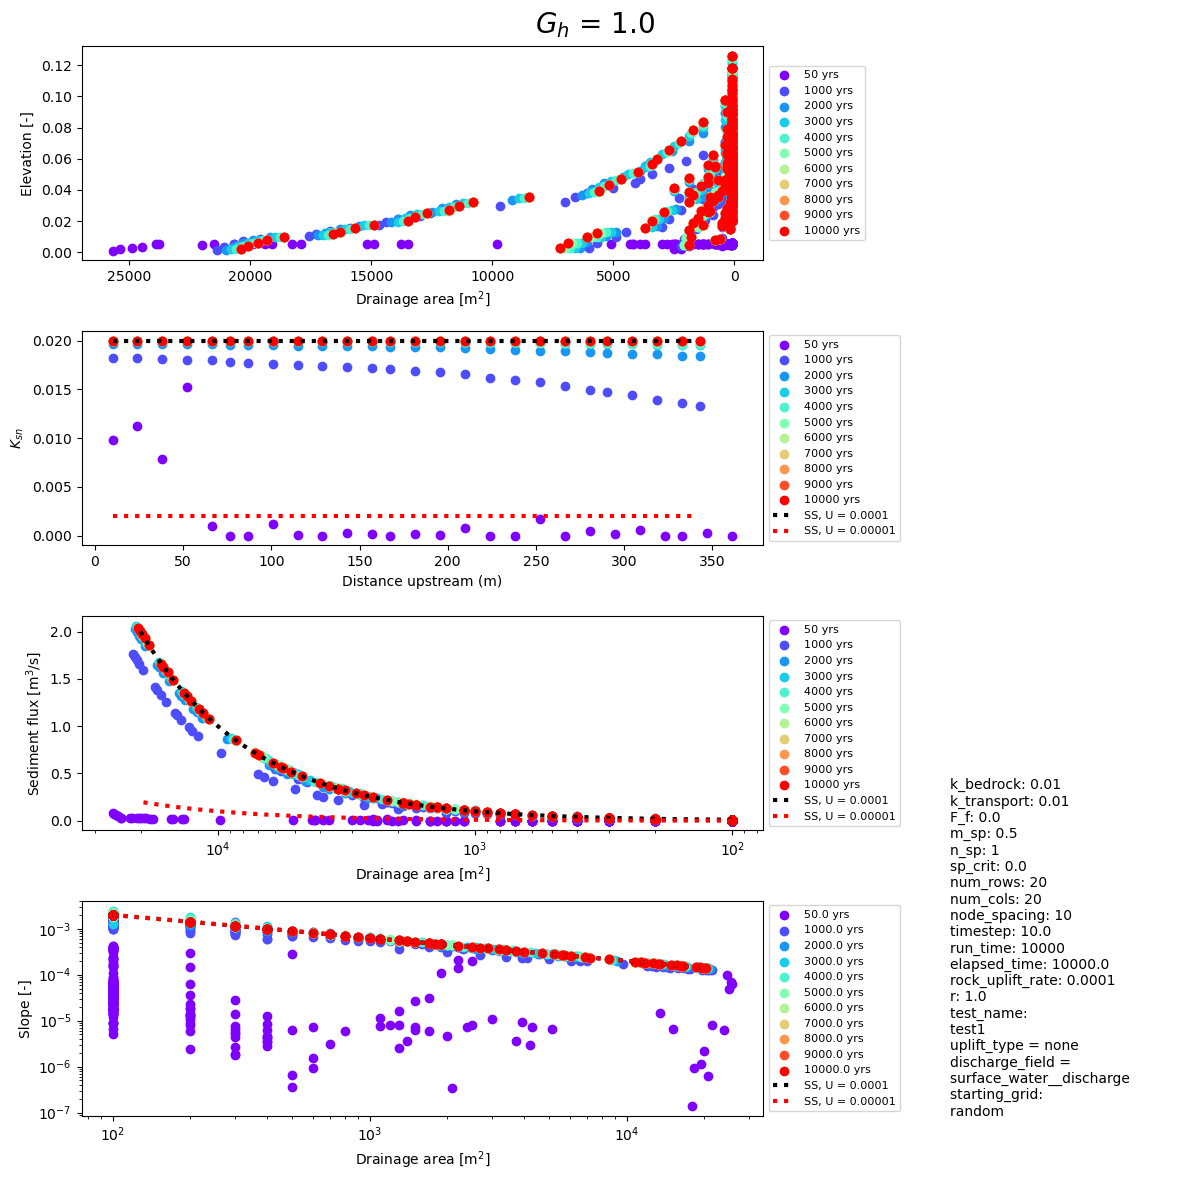

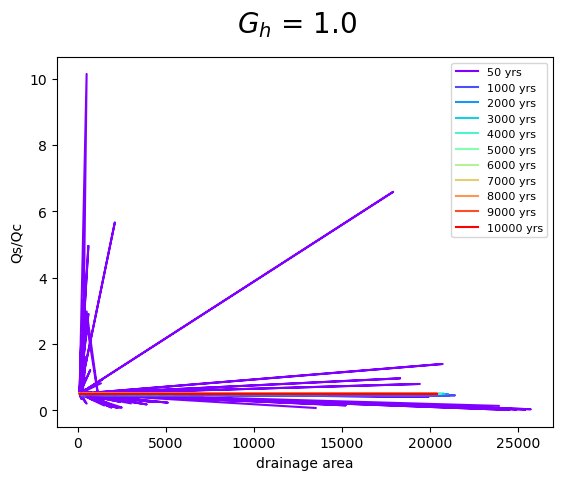

In [7]:
# Run SSPM
sspm = TestSSPM(run_time=run_time, print_time=print_time, plot_times=plot_times, **TestDict, ksn_series=False, qs_plot=True) 
#Ksn_series prints ksn map at each timestep
# qs_plot shows qs/qc vs Area for each timestep
sspm.run_SSPM()
sspm.plot() #plot last time step
sspm.finalize_plots(save=save_figures, # saves figures in a new directory
                    show = False, # not needed for Jupyter notebooks, otherwise needed to show plots
                    directory="./output/figures", # directory for saved figures
                    watersheds = 2, # number of profiles to plot
                    plot_map=False, # plot of plotted channels on elevation map
                    plot_channels=False, # plots elevation profiles
                    ksn_map=False, # map of Ksn 
                    topo_map=False, # map of topography, no profiles
                    chi_map=False, #map of chi
                    UA_plot=False, #plots comapring Qs and UA to check for steady state
                    ksn_profiles=False, # weird Ksn profiles designed for checking analytical solution, usually I go into TestSSPM and change the y axis range
                    ksn_profiles2=False, # Ksn profiles
                    qsqc=False # A vs. Qs/Qc
                   )

In [41]:
# plot extra plots (set plot_map, plot_channels..,etc to True)
sspm.finalize_plots(save=save_figures, show = False, directory="./output/figures",
                    watersheds = 2, # number of profiles to plot
                    plot_map=False, # plot of plotted channels on elevation map
                    plot_channels=False, # plots elevation profiles
                    ksn_map=False, # map of Ksn 
                    topo_map=False, # map of topography, no profiles
                    chi_map=False, #map of chi
                    UA_plot=False, #plots comapring Qs and UA to check for steady state
                    ksn_profiles=False, # weird Ksn profiles designed for checking analytical solution
                    ksn_profiles2=False, # Ksn profiles
                    qsqc=False # A vs. Qs/Qc
                   )

/Users/anniet/Documents/sharingSSPM/SetupSSPM_shared.py:464: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.qs_fig.suptitle(title, fontsize=20)


Save Grid

In [42]:
sspm.save_grid() #directory = ""

/var/folders/mv/1rr5g5hs0kngjy46wtz0pzn40000gn/T/ipykernel_16333/1661433597.py:1: DeprecationWarning: landlab.io.write_esri_ascii has been deprecated, use landlab.io.esri_ascii.dump instead
  sspm.save_grid() #directory = ""


In [55]:
#create new parameters
run_time2 = 3000
plot_times2 = np.arange(0, run_time2 + 1, run_time2 // 10)  # Use to plot series of time steps
plot_times2[0] = 50  # Set first plotted time to 50
#plot_times2 = [run_time]

TestDict2 = {
    "test_name": "test2",

    # landscape conditions
    "k_bedrock": 1E-2,
    "k_transport": 1E-2,
    "rock_uplift_rate":0.000,
    "uplift_type": "none", # "none", "block", or "ramp"
    "sp_crit": 0.0, # threshold
    "discharge_field": "surface_water__discharge", # use "water__unit_flux_in" if varying water discharge

    # grid parameters
    # make sure these match TestDict1 values
    "node_spacing": 10,
    "num_rows": 20,
    "num_cols": 20,

    "timestep": 10.0, # timestep size. Lower if encountering chaotic results. Can be increased for lower K values.
    "solver": "basic", # "basic" or "adaptive",
    "starting_grid":f"{sspm.export_file_name}"

}

save_figures2 = False #True if you want to save to output/figures

Elapsed time {} 0
Elapsed time {} 1000.0
Elapsed time {} 2000.0


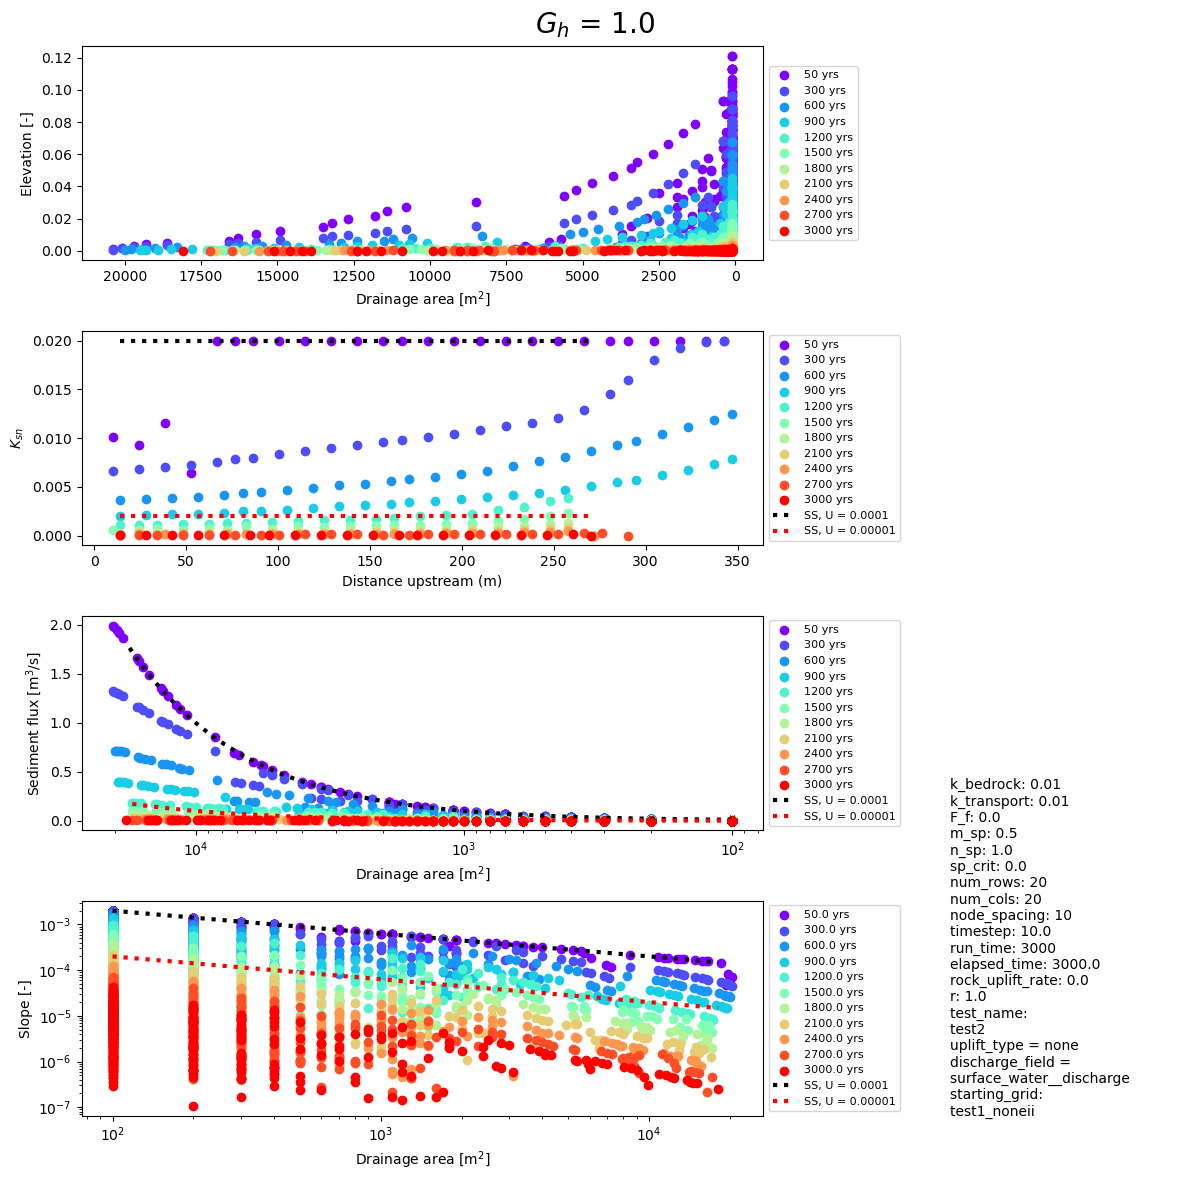

In [56]:
# Run SSPM
sspm2 = TestSSPM(run_time=run_time2, plot_times=plot_times2, **TestDict2, ksn_series=False, qs_plot=False)
sspm2.run_SSPM()
sspm2.plot() #plot last time step
sspm2.finalize_plots(save=save_figures2, show = False, directory="./output/figures",
                    watersheds = 1, # number of profiles to plot
                    plot_map=False, # plot of plotted channels on elevation map
                    plot_channels=False, # plots elevation profiles
                    ksn_map=False, # map of Ksn 
                    topo_map=False, # map of topography, no profiles
                    chi_map=False, #map of chi
                    UA_plot=False, #plots comapring Qs and UA to check for steady state
                    ksn_profiles=False, # weird Ksn profiles designed for checking analytical solution
                    ksn_profiles2=False, # Ksn profiles
                    qsqc=False # A vs. Qs/Qc
                   )

In [ ]:
sspm2.finalize_plots(save=save_figures2, show = False, directory="./output/figures",
                    watersheds = 1, # number of profiles to plot
                    plot_map=True, # plot of plotted channels on elevation map
                    plot_channels=False, # plots elevation profiles
                    ksn_map=False, # map of Ksn 
                    topo_map=False, # map of topography, no profiles
                    chi_map=False, #map of chi
                    UA_plot=False, #plots comapring Qs and UA to check for steady state
                    ksn_profiles=False, # weird Ksn profiles designed for checking analytical solution
                    ksn_profiles2=False, # Ksn profiles
                    qsqc=False # A vs. Qs/Qc
                   )

# Create Custom Grid

In [17]:
num_rows = 10
num_cols = 10
node_spacing = 10

mg = RasterModelGrid((num_rows, num_cols), node_spacing) #create grid
mg.add_zeros('topographic__elevation', at='node')


#divided_factor = 100
#mg['node']['topographic__elevation'] += mg.node_x / divided_factor \
#    + mg.node_x / divided_factor + np.random.rand(len(mg.node_y)) / divided_factor


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

examples of grid modification:

In [18]:
# plane tilted to NW corner
divided_factor = 100
mg['node']['topographic__elevation'] += mg.node_x / divided_factor + mg.node_y / divided_factor
    #+ mg.node_x / divided_factor + np.random.rand(len(mg.node_y)) / divided_factor

In [19]:
#print new elevation values
np.set_printoptions(precision=1, suppress=True)  # print 1 decimals
elevation = mg['node']['topographic__elevation']
print(elevation.reshape((num_rows, num_cols)))

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]
 [0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3]
 [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]
 [0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
 [0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6]
 [0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7]
 [0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8]]


In [20]:
# add random noise to grid
np.random.seed(0)  # seed set to zero so our figures are reproducible
mg_noise = np.random.rand(mg.number_of_nodes) / 1000.0  # intial noise on elevation grid
mg['node']['topographic__elevation'] += mg_noise 

In [21]:
#print new elevation values
np.set_printoptions(precision=3, suppress=True)  # print 3 decimals
elevation = mg['node']['topographic__elevation']
print(elevation.reshape((num_rows, num_cols)))

[[0.001 0.101 0.201 0.301 0.4   0.501 0.6   0.701 0.801 0.9  ]
 [0.101 0.201 0.301 0.401 0.5   0.6   0.7   0.801 0.901 1.001]
 [0.201 0.301 0.4   0.501 0.6   0.701 0.8   0.901 1.001 1.1  ]
 [0.3   0.401 0.5   0.601 0.7   0.801 0.901 1.001 1.101 1.201]
 [0.4   0.5   0.601 0.7   0.801 0.901 1.    1.1   1.2   1.3  ]
 [0.501 0.6   0.701 0.8   0.9   1.    1.101 1.2   1.3   1.4  ]
 [0.6   0.7   0.801 0.9   1.    1.1   1.201 1.3   1.401 1.5  ]
 [0.701 0.8   0.901 1.001 1.101 1.2   1.3   1.4   1.5   1.6  ]
 [0.8   0.9   1.    1.101 1.201 1.3   1.401 1.5   1.601 1.701]
 [0.9   1.001 1.1   1.201 1.3   1.4   1.501 1.6   1.701 1.8  ]]


In [22]:
# create unique array and add it to elevation
topo = np.zeros((num_rows, num_cols)) # create array of zeroes
topo[:, int(num_cols/2):] = 5 
topo2 = topo.ravel() #make array 1-dimensional
mg['node']['topographic__elevation'] = topo2

In [23]:
#print new elevation values
elevation = mg['node']['topographic__elevation']
print(elevation.reshape((num_rows, num_cols)))

[[0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0. 5. 5. 5. 5. 5.]]


In [25]:
# create sloped surface
slope = .3  # set ramp slope
topo = np.tile(np.arange(num_cols) * slope, (num_rows, 1))
topo2 = topo.ravel() #make array 1-dimensional
mg['node']['topographic__elevation'] = topo2

In [26]:
#print new elevation values
elevation = mg['node']['topographic__elevation']
print(elevation.reshape((num_rows, num_cols)))

[[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]
 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]
 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]
 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]
 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]
 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]
 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]
 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]
 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]
 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7]]


Save Grid

In [27]:
from landlab.io import write_esri_ascii, read_esri_ascii
directory = "./output/grids"
export_name = "slope"
while os.path.isfile(f"{directory}/{export_name}_topo.asc"): 
            export_name += "i"
write_esri_ascii(f"{directory}/{export_name}_topo.asc", mg, 'topographic__elevation')

['./output/grids/slopei_topo.asc']